In [0]:
import numpy as np
from sklearn import datasets 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.pyplot as plt

In [0]:
#Importación del conjunto Iris
iris = datasets.load_iris()

In [0]:
#Columnas con las que se desea trabajar
cols = [3, 2, 1]

#Generamos una semilla para que los resusltados sean los mismos, esta se ocupara mas adelante
#np.random.seed(10)
normalizador = MinMaxScaler()
X = normalizador.fit_transform(iris.data[:,cols])

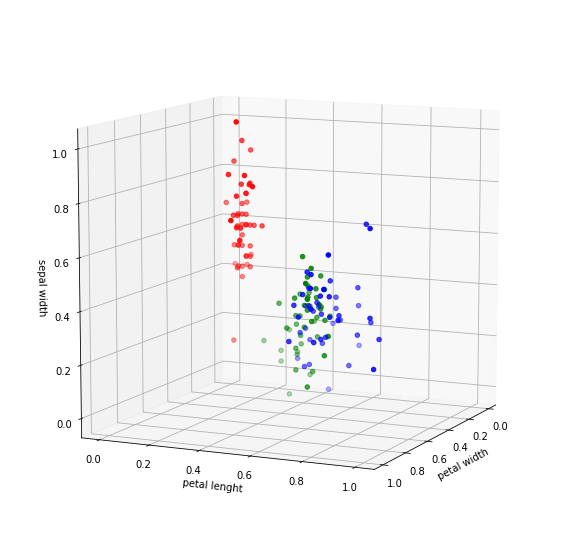

In [0]:
#Generacion de la Grafica
feats = ["sepal lenght", "sepal width", "petal lenght", "petal width"]
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = plt.axes(projection='3d')
indx0 = np.arange(0,50)
indx1 = np.arange(50,100)
indx2 = np.arange(100,150)
ax.scatter3D(X[indx0,0], X[indx0,1], X[indx0,2], color='Red');
ax.scatter3D(X[indx1,0], X[indx1,1], X[indx1,2], color='Green');
ax.scatter3D(X[indx2,0], X[indx2,1], X[indx2,2], color='Blue');

ax.set_xlabel(feats[cols[0]])
ax.set_ylabel(feats[cols[1]])
ax.set_zlabel(feats[cols[2]])

ax.view_init(10, 25)

In [0]:
#Visualizacion de los elementos en X sin la columna de 1's
X[0:150:15]

array([[0.04166667, 0.06779661, 0.625     ],
       [0.125     , 0.08474576, 1.        ],
       [0.04166667, 0.10169492, 0.45833333],
       [0.08333333, 0.06779661, 0.41666667],
       [0.375     , 0.42372881, 0.        ],
       [0.54166667, 0.57627119, 0.41666667],
       [0.45833333, 0.57627119, 0.25      ],
       [0.83333333, 0.94915254, 0.41666667],
       [0.91666667, 0.79661017, 0.5       ],
       [0.91666667, 0.86440678, 0.41666667]])

In [0]:
#Concatenar una columna con 1's al vector XX para el bias 
#dejar en X únicamente elementos de 2 clases. Para esto, es importante que pruebe con la 1a clase y la 2a, la 2a y la 3a, etc.
unos = np.ones((100,1))

#XX = np.concatenate((unos,X[0:100]), axis=1) #clases 0 y 1
XX = np.concatenate((unos,X[50:150]), axis=1) #clases 1 y 2



In [0]:
print(XX[0:100:10])
print(XX.shape)

[[1.         0.54166667 0.62711864 0.5       ]
 [1.         0.375      0.42372881 0.        ]
 [1.         0.70833333 0.6440678  0.5       ]
 [1.         0.41666667 0.47457627 0.16666667]
 [1.         0.45833333 0.57627119 0.25      ]
 [1.         1.         0.84745763 0.54166667]
 [1.         0.79166667 0.69491525 0.5       ]
 [1.         0.91666667 0.79661017 0.5       ]
 [1.         0.75       0.86440678 0.33333333]
 [1.         0.95833333 0.77966102 0.45833333]]
(100, 4)


In [0]:
#El vector Y deberá tener +1 para elementos de una clase y -1 para la otra clase
Y = np.arange(100)
Y = (Y>=50)*2-1

In [0]:
print(Y[:100:10])

[-1 -1 -1 -1 -1  1  1  1  1  1]


In [0]:
#Generamos un vector de pesos 
W = np.random.uniform(low=-0.1, high=0.1, size=4)
print(W.shape, W)

(4,) [ 0.09728607  0.06608094  0.07864013 -0.07971756]


In [0]:
#Definimos la función signo
def signo(x):
  return  (x>=0)*2-1 

In [0]:
#Ejecutamos el algortimo de perceptron 
hAcc = np.array([])
cambios = np.array([])  #Debe guardar en una variable todos los valores de W, para generar la gráfica que se pedirá a continuación  →  historia.
aprende = 0.2           #Factor de aprendizaje
niters = 50     #variable niters para llevar el número de iteraciones, ésta servirá para saber el número de cambios que sufrió W.
bestW = W
bestAcc = 0 
bestIndx = 0
for i in range(niters):
  j = np.random.randint(0,100,1)
  v = XX[j,:].dot(W.T)
  y = signo(v)
  W = W + aprende * (Y[j] - y ) * XX[j,:]
  
  cambios = np.append(cambios,W)
  hAcc = np.append(hAcc,((signo(XX.dot(W.T).reshape(XX.shape[0]))== Y ) * 1.0).mean())

  if( i%20 == 0):
    print(hAcc[i])

  if(i>0 and hAcc[i]> hAcc[i-1]):
    bestW = W
    bestAcc = hAcc[i]
    bestIndx = i

  


0.5
0.5
0.63


In [0]:
print(W, W.shape)

[[-0.70271393  0.34941427  0.33626725 -0.37971756]] (1, 4)


In [0]:
#historia de los cambios en los pesos
print(cambios[:3])

[0.09728607 0.06608094 0.07864013]


In [0]:
print(bestW, bestW.shape, bestIndx, bestAcc)

[[-0.30271393  0.31608094  0.42440285 -0.19638423]] (1, 4) 39 0.63


(50, 4)
[[ 0.09728607  0.06608094  0.07864013 -0.07971756]
 [-0.30271393 -0.15058573 -0.17898699 -0.2130509 ]
 [ 0.09728607  0.08274761  0.09897912 -0.07971756]]


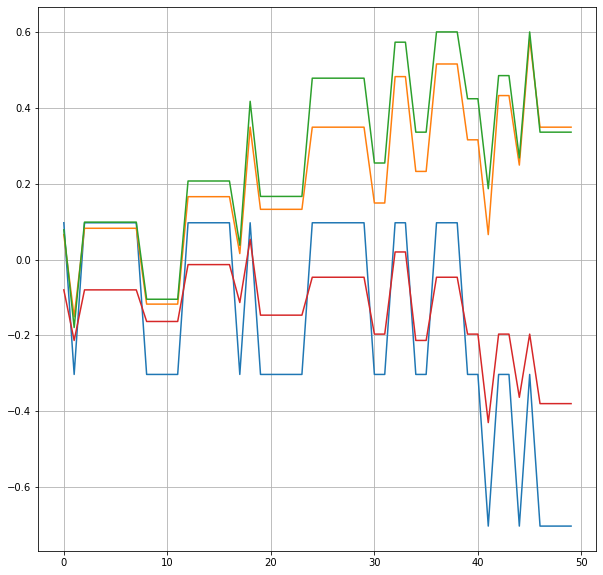

In [0]:
#historia de los cambios en los pesos
cambios = np.array(cambios).reshape((niters,4))
print(cambios.shape)
print(cambios[:3])
fig = plt.plot(cambios)
fig = plt.grid()
plt.show(fig)

In [0]:
print(hAcc)
print(hAcc.shape)

[0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.51 0.51 0.5  0.5  0.94 0.94 0.5  0.5  0.5  0.63 0.63 0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5 ]
(50,)


(50,)


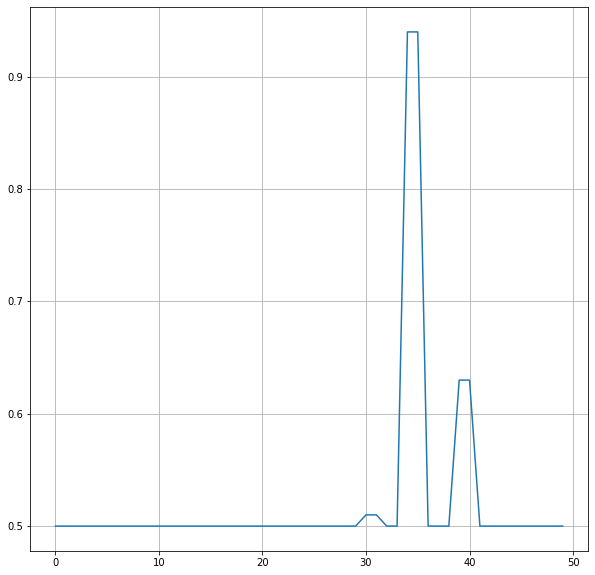

In [0]:
a = x = np.arange(0,niters,1)
print(a.shape)
fig = plt.plot(a,hAcc)
fig = plt.grid()
plt.show(fig)

In [0]:
#maximos y minimos para saber los rangos
maxi = XX.max(axis=0)
mini = XX.min(axis=0)
print(maxi)
print(mini)

[1.   1.   1.   0.75]
[1.         0.375      0.33898305 0.        ]


In [0]:
# Generación del meshgid para imprimir el plano 
#los máximos y mínimos para el linspace son escalares, estabas enviando un vector.
#x = np.linspace(mini[1], maxi[1], 5)
#y = np.linspace(mini[2], maxi[2], 5)

# pero como x, y estan normalizados entre 0 y 1, puedes directamente generar x, y con esos valores entre 0 1
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)

print(x)
print(y)
xx, yy = np.meshgrid(x,y) 
print(xx)
print(yy)

[0.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5  0.75 1.  ]
[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]
[[0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25]
 [0.5  0.5  0.5  0.5  0.5 ]
 [0.75 0.75 0.75 0.75 0.75]
 [1.   1.   1.   1.   1.  ]]


In [0]:
xx

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [0]:
yy

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  , 1.  , 1.  ]])

In [0]:
bestW.shape

(1, 4)

In [0]:
#aplicando ecuacion  para plano (calcular zz)
zz = (-W[0][0] - W[0][1]*xx - W[0][2]*yy) / W[0][3]

In [0]:
zz

array([[-1.85062267, -1.62057387, -1.39052507, -1.16047628, -0.93042748],
       [-1.62922966, -1.39918086, -1.16913207, -0.93908327, -0.70903447],
       [-1.40783665, -1.17778786, -0.94773906, -0.71769027, -0.48764147],
       [-1.18644365, -0.95639485, -0.72634606, -0.49629726, -0.26624846],
       [-0.96505064, -0.73500185, -0.50495305, -0.27490425, -0.04485546]])

(100, 4)


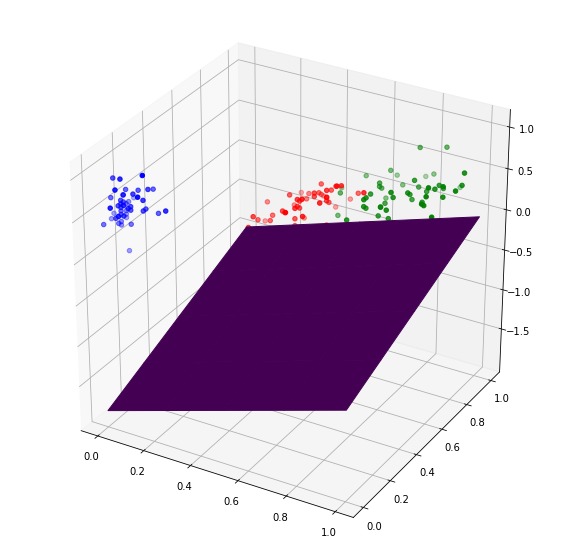

In [0]:
print(XX.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = (8,8)

indx0 = np.arange(0, 50)
indx1 = np.arange(50, 100)
indx2 = np.arange(100, 150)

ax.scatter3D(X[indx0, 0], X[indx0, 1], X[indx0, 2], color= 'blue')
ax.scatter3D(X[indx1, 0], X[indx1, 1], X[indx1, 2], color='red')
ax.scatter3D(X[indx2, 0], X[indx2, 1], X[indx2, 2], color='green')
norm = plt.Normalize(5, 7)
colors = cm.viridis(norm(xx))
rcount, ccount, _ = colors.shape
ax.plot_surface(xx,yy,zz,rcount=rcount, ccount=ccount,facecolors=colors, shade=False)



#nota se muestran los datos originales, y el plano debe cortar a los elementos de las clases en cuestion.